# Stock Market Overview

In [87]:
from yahoo_fin.stock_info import *
from yahoo_fin import stock_info as si
from datetime import date, timedelta
import requests
import numpy as np
import warnings
import pandas_datareader as web
from yahoofinancials import YahooFinancials
warnings.filterwarnings('ignore')
today = str(date.today())


In [69]:
cad_us = web.get_data_fred('DEXCAUS', start_dt, end_dt)
cny_us = web.get_data_fred('DEXCHUS', start_dt, end_dt)
cny_cad = cny_us['DEXCHUS']/cad_us['DEXCAUS']
cny_cad

DATE
2018-12-12    5.157319
2018-12-13    5.153794
2018-12-14    5.157989
2018-12-17    5.150261
2018-12-18    5.119486
2018-12-19    5.130118
2018-12-20    5.093156
2018-12-21    5.088283
dtype: float64

In [78]:
start_dt = str(date.today()- timedelta(days=30))
end_dt = today

In [93]:
SP_TSX = get_data("^GSPTSE", start_date = start_dt, end_date = end_dt)
SP500 = get_data("^GSPC", start_date = start_dt, end_date = end_dt)
DOWJ = get_data("^DJI", start_date = start_dt, end_date = end_dt)
NASDAQ = get_data("^IXIC", start_date = start_dt, end_date = end_dt)
VIX = get_data("^VIX", start_date = start_dt, end_date = end_dt)
NIKKEI = get_data("^N225", start_date = start_dt, end_date = end_dt)
HANGSENG = get_data("^HSI", start_date = start_dt, end_date = end_dt)
CBOE_10Y_Bond = get_data("^TNX", start_date = start_dt, end_date = end_dt)

stocks = pd.DataFrame({"SP_TSX": SP_TSX["adjclose"],
                      "SP500": SP500["adjclose"],
                      "DOWJ": DOWJ["adjclose"],
                      "NASDAQ": NASDAQ["adjclose"],
                      "VIX": VIX["adjclose"],
                      "NIKKEI": NIKKEI["adjclose"],
                      "HANGSENG": HANGSENG["adjclose"],
                      "CBOE_10Y_Bond": CBOE_10Y_Bond["adjclose"]})


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000020E3DC259E8>,
      dtype=object)

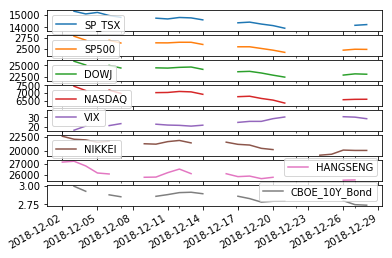

In [94]:
stocks.plot(subplots=True)

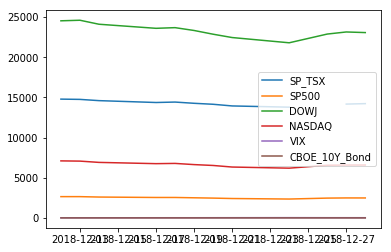

In [74]:
nort_america_stocks.plot()

ValueError: substring not found